In [1]:
!pip install gekko

    100% |████████████████████████████████| 6.0MB 4.5MB/s 
    100% |████████████████████████████████| 92kB 21.8MB/s 
    100% |████████████████████████████████| 51kB 17.0MB/s 
    100% |████████████████████████████████| 71kB 20.5MB/s 
  Running setup.py bdist_wheel for itsdangerous ... done
  Stored in directory: /content/.cache/pip/wheels/2c/4a/61/5599631c1554768c6290b08c02c72d7317910374ca602ff1e5
Successfully built itsdangerous


In [1]:
from gekko import GEKKO
import math

In [2]:
# Initialize GEKKO model
m = GEKKO()

*Set up initial parameters*

In [3]:
num_initiatives = 10
num_days = 30
max_resources_per_day = 20

In [4]:
resources = [2., 3., 1., 1., 2., 7., 4., 1., 5., 3.]

In [5]:
duration = [2., 3., 1., 2., 5., 3., 4., 3., 2., 4.]

In [6]:
timing_mat = [0 if (day%7 == 5) or (day%7 == 6) else 1 for day in range(num_days)]
timing_mat[0] = 0

In [7]:
start_time = [m.Var(value=1, lb=1, ub=num_days-duration[initiative]+1, integer=True) for initiative in range(num_initiatives)]

In [8]:
# c0 =  m.Const(0)
# c1 =  m.Const(1)
# c_max_resources_per_day =  m.Const(max_resources_per_day)

*Constraint Equations*

In [9]:
timing_eqs = []
precedence_eqs = []
sequence_eqs = []
concurrence_eqs = []
offset_eqs = []
resource_eqs = []


# Declaring a lot of variables to avoid the degrees of freedom error
random=[m.Var(value=1, lb=1, ub=10, integer=True) for x in range(100)]

In [10]:
#Resource
for day in range(1, num_days+1):
    resource_sum = 0
    
    for initiative in range(num_initiatives):
        resource_sum += resources[initiative] * m.exp((-1.) * (((2.*day - 2*start_time[initiative] - duration[initiative] + 1.)/duration[initiative])**8.))
        
    resource_eqs.append(resource_sum <= max_resources_per_day)
    
print(resource_eqs)

# # Different constraint for Resource check
# for day in range(1, num_days+1):
#     resource_sum = 0
    
#     for initiative in range(num_initiatives):
#         resource_sum += resources[initiative] * m.exp(math.tan(-1.5707963)*(start_time[initiative]-day))
    
#     resource_eqs.append(resource_sum <= max_resources_per_day)
    
# print(resource_eqs)

[((((((((((0+((2.0)*(exp(((-1.0)*((((((((2.0-((2)*(int_v1)))-2.0)+1.0))/(2.0)))^(8.0))))))))+((3.0)*(exp(((-1.0)*((((((((2.0-((2)*(int_v2)))-3.0)+1.0))/(3.0)))^(8.0))))))))+((1.0)*(exp(((-1.0)*((((((((2.0-((2)*(int_v3)))-1.0)+1.0))/(1.0)))^(8.0))))))))+((1.0)*(exp(((-1.0)*((((((((2.0-((2)*(int_v4)))-2.0)+1.0))/(2.0)))^(8.0))))))))+((2.0)*(exp(((-1.0)*((((((((2.0-((2)*(int_v5)))-5.0)+1.0))/(5.0)))^(8.0))))))))+((7.0)*(exp(((-1.0)*((((((((2.0-((2)*(int_v6)))-3.0)+1.0))/(3.0)))^(8.0))))))))+((4.0)*(exp(((-1.0)*((((((((2.0-((2)*(int_v7)))-4.0)+1.0))/(4.0)))^(8.0))))))))+((1.0)*(exp(((-1.0)*((((((((2.0-((2)*(int_v8)))-3.0)+1.0))/(3.0)))^(8.0))))))))+((5.0)*(exp(((-1.0)*((((((((2.0-((2)*(int_v9)))-2.0)+1.0))/(2.0)))^(8.0))))))))+((3.0)*(exp(((-1.0)*((((((((2.0-((2)*(int_v10)))-4.0)+1.0))/(4.0)))^(8.0))))))))<=20, ((((((((((0+((2.0)*(exp(((-1.0)*((((((((4.0-((2)*(int_v1)))-2.0)+1.0))/(2.0)))^(8.0))))))))+((3.0)*(exp(((-1.0)*((((((((4.0-((2)*(int_v2)))-3.0)+1.0))/(3.0)))^(8.0))))))))+((1.0)*(e

In [11]:
#Timing

for initiative in range(num_initiatives):
    timing_constraint = 1
    
    for day in range(num_days):
        if timing_mat[day]:
            timing_constraint *= start_time[initiative] - (day + 1)
    
    timing_eqs.append(timing_constraint == 0)

print(timing_eqs)



# Alternate timing constraint
for initiative in range(num_initiatives):
    timing_constraint = 1
    
    for day in range(num_days):
        if timing_mat[day]:
            timing_constraint = timing_constraint*(m.log(start_time[initiative] / (day + 1)))
    
    timing_eqs.append(timing_constraint == 0)

print(timing_eqs)

[((((((((((((((((((((((((((((((((((((((((((1)*((int_v1-2))))*((int_v1-3))))*((int_v1-4))))*((int_v1-5))))*((int_v1-8))))*((int_v1-9))))*((int_v1-10))))*((int_v1-11))))*((int_v1-12))))*((int_v1-15))))*((int_v1-16))))*((int_v1-17))))*((int_v1-18))))*((int_v1-19))))*((int_v1-22))))*((int_v1-23))))*((int_v1-24))))*((int_v1-25))))*((int_v1-26))))*((int_v1-29))))*((int_v1-30)))=0, ((((((((((((((((((((((((((((((((((((((((((1)*((int_v2-2))))*((int_v2-3))))*((int_v2-4))))*((int_v2-5))))*((int_v2-8))))*((int_v2-9))))*((int_v2-10))))*((int_v2-11))))*((int_v2-12))))*((int_v2-15))))*((int_v2-16))))*((int_v2-17))))*((int_v2-18))))*((int_v2-19))))*((int_v2-22))))*((int_v2-23))))*((int_v2-24))))*((int_v2-25))))*((int_v2-26))))*((int_v2-29))))*((int_v2-30)))=0, ((((((((((((((((((((((((((((((((((((((((((1)*((int_v3-2))))*((int_v3-3))))*((int_v3-4))))*((int_v3-5))))*((int_v3-8))))*((int_v3-9))))*((int_v3-10))))*((int_v3-11))))*((int_v3-12))))*((int_v3-15))))*((int_v3-16))))*((int_v3-17))))*((int_v3-18)))

In [12]:
#Concurrence
concurrence_list = [[1,0], [3,0]]

concurrence_eqs = []
for pair in concurrence_list:
    concurrence_eqs.append(start_time[pair[0]] == start_time[pair[1]] + 1)
    
print(concurrence_eqs)

[int_v2=(int_v1+1), int_v4=(int_v1+1)]


In [13]:
#Precedence
precedence_list = [[2,0], [4,2]]

precedence_eqs = []
for pair in precedence_list:
    precedence_eqs.append(start_time[pair[0]] >= start_time[pair[1]] + duration[pair[1]])
    
print(precedence_eqs)

[int_v3>=(int_v1+2.0), int_v5>=(int_v3+1.0)]


In [14]:
#Offset
offset_list = [[3,0], [8,0], [9,8]]

offset_eqs = []
for pair in offset_list:
    offset_eqs.append(start_time[pair[0]] >= start_time[pair[1]] + 1)
    
print(offset_eqs)

[int_v4>=(int_v1+1), int_v9>=(int_v1+1), int_v10>=(int_v9+1)]


In [15]:
#Sequence
sequence_list = [[5,4], [6,5]]

sequence_eqs = []
for pair in sequence_list:
    sequence_eqs.append(start_time[pair[0]] == start_time[pair[1]] + duration[pair[1]])
    
print(sequence_eqs)

[int_v6=(int_v5+5.0), int_v7=(int_v6+3.0)]


*Compile all constraint equations together*

In [16]:
eqs = m.Equations(resource_eqs + timing_eqs + precedence_eqs + sequence_eqs + offset_eqs + concurrence_eqs)
print(eqs)

[<gekko.gekko.EquationObj object at 0x000001F796EE1760>, <gekko.gekko.EquationObj object at 0x000001F796EE1970>, <gekko.gekko.EquationObj object at 0x000001F796EE1A30>, <gekko.gekko.EquationObj object at 0x000001F796EE19A0>, <gekko.gekko.EquationObj object at 0x000001F796EE18B0>, <gekko.gekko.EquationObj object at 0x000001F796EE17F0>, <gekko.gekko.EquationObj object at 0x000001F796EE1A00>, <gekko.gekko.EquationObj object at 0x000001F796EE1C70>, <gekko.gekko.EquationObj object at 0x000001F796EE1910>, <gekko.gekko.EquationObj object at 0x000001F796EE1880>, <gekko.gekko.EquationObj object at 0x000001F796EE1730>, <gekko.gekko.EquationObj object at 0x000001F796EE1B20>, <gekko.gekko.EquationObj object at 0x000001F796EE1CD0>, <gekko.gekko.EquationObj object at 0x000001F796EE1D90>, <gekko.gekko.EquationObj object at 0x000001F796EE1CA0>, <gekko.gekko.EquationObj object at 0x000001F796EE1580>, <gekko.gekko.EquationObj object at 0x000001F796EE1AC0>, <gekko.gekko.EquationObj object at 0x000001F796

*Define objective function*

In [17]:
obj = 0
for elem in start_time:
    obj += elem
    
print(obj)

((((((((((0+int_v1)+int_v2)+int_v3)+int_v4)+int_v5)+int_v6)+int_v7)+int_v8)+int_v9)+int_v10)


In [18]:
m.Obj(obj)

*Configure solver options*

In [19]:
m.options.IMODE = 3
m.options.SOLVER = 3
m.options.MAX_ITER = 1000

In [20]:
m.solve()

apm 106.67.110.54_gk_model0 <br><pre> ----------------------------------------------------------------
 APMonitor, Version 0.9.2
 APMonitor Optimization Suite
 ----------------------------------------------------------------
 
 
 --------- APM Model Size ------------
 Each time step contains
   Objects      :            0
   Constants    :            0
   Variables    :          145
   Intermediates:            0
   Connections  :            0
   Equations    :           60
   Residuals    :           60
 
 Number of state variables:            145
 Number of total equations: -           59
 Number of slack variables: -           35
 ---------------------------------------
 Degrees of freedom       :             51
 
 **********************************************
 Steady State Optimization with Interior Point Solver
 **********************************************
  
  
 Info: Exact Hessian

******************************************************************************
This program con

Exception:  @error: Solution Not Found


*Best solution*

In [21]:
for var in start_time:
    print(var.value, var.name)

[1.] int_v1
[1.] int_v2
[1.] int_v3
[1.] int_v4
[1.] int_v5
[1.] int_v6
[1.] int_v7
[1.] int_v8
[1.] int_v9
[1.] int_v10


In [31]:
start_time

[[1.0],
 [2.729535],
 [1.0],
 [1.0],
 [2.661119],
 [1.0],
 [1.0],
 [2.527068],
 [1.0],
 [2.765724]]

In [ ]:
import numpy as np

In [ ]:
ans = np.round(start_time).astype(int)

In [ ]:
day_list = []
for initiative in range(ans.shape[0]):
    for day in range(int(duration[initiative])):
        day_list.append([initiative, ans[initiative][0] + day, int(resources[initiative])])

In [35]:
day_list

[[0, 1, 2],
 [0, 2, 2],
 [1, 3, 3],
 [1, 4, 3],
 [1, 5, 3],
 [2, 1, 1],
 [3, 1, 1],
 [3, 2, 1],
 [4, 3, 2],
 [4, 4, 2],
 [4, 5, 2],
 [4, 6, 2],
 [4, 7, 2],
 [5, 1, 7],
 [5, 2, 7],
 [5, 3, 7],
 [6, 1, 4],
 [6, 2, 4],
 [6, 3, 4],
 [6, 4, 4],
 [7, 3, 1],
 [7, 4, 1],
 [7, 5, 1],
 [8, 1, 5],
 [8, 2, 5],
 [9, 3, 3],
 [9, 4, 3],
 [9, 5, 3],
 [9, 6, 3]]

In [ ]:
ans = np.zeros((num_initiatives, num_days))
res_ans = np.zeros((num_initiatives, num_days))

for elem in day_list:
    ans[elem[0],elem[1]-1] = 1

for elem in day_list:
    res_ans[elem[0],elem[1]-1] = elem[2]

*Visualize final schedule plan*

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

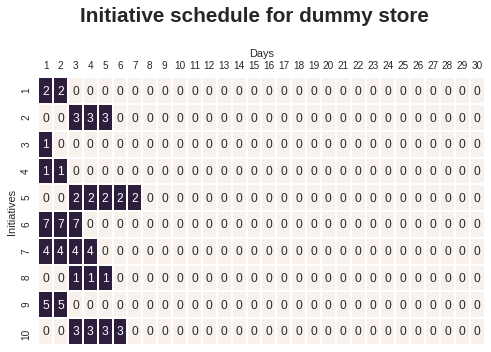

In [38]:
fig, ax = plt.subplots()

v = (sns.heatmap(ans, linewidths=1, cbar=False, 
                 annot=np.where(res_ans==0, 0, res_ans), 
                 ax=ax)
    .set(xlabel='Days',
         ylabel='Initiatives',
        xticklabels=range(1, num_days+1),
        yticklabels=range(1, num_initiatives+1)[::-1]))

ax.xaxis.tick_top()
ax.xaxis.set_label_position('top')
fig.suptitle('Initiative schedule for dummy store',
             fontweight='bold', fontsize='xx-large')
plt.subplots_adjust(top=.8)